In [ ]:
# --- CELL 1: SETUP & DATA LOADING ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Import display to show multiple tables

# 1. Define column names
# The Adult dataset does not have a header, so we define it manually based on documentation.
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# 2. Load data directly from the UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, names=columns, skipinitialspace=True)

# 3. Quick Check
print("Dataset successfully loaded.")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n--- First 5 Rows ---")
display(df.head())

print("\n--- Last 5 Rows ---")
display(df.tail())

Dataset successfully loaded.
Rows: 32561, Columns: 15

--- First 5 Rows ---


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



--- Last 5 Rows ---


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


--- 1. Missing Values Analysis ---


,Missing Count,% of Total
workclass,1836,5.64
occupation,1843,5.66
native-country,583,1.79


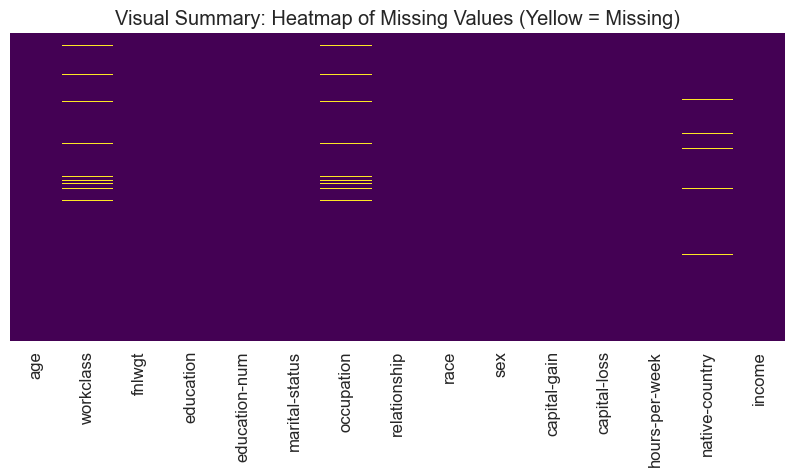


--- 2. Formatting & Inconsistent Labels ---
No whitespace formatting issues found.

--- 3. Redundancy Check (Education vs Education-Num) ---
Proof of Redundancy (1-to-1 Mapping):


,education,education-num
13,Preschool,1.0
3,1st-4th,2.0
4,5th-6th,3.0
5,7th-8th,4.0
6,9th,5.0



--- 4. Duplicate Entries ---
Total Duplicate Rows: 24
Sample of Duplicate Rows:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K


In [ ]:
# --- CELL 2: Q1a DATA QUALITY ASSESSMENT 

# A. MISSING VALUES ('?')
# ---------------------------------------------------------
print("--- 1. Missing Values Analysis ---")
# Replace '?' with NaN to detect them
df_quality = df.replace('?', np.nan)

# Quantify
missing_values = df_quality.isnull().sum()
missing_table = missing_values[missing_values > 0].to_frame(name='Missing Count')
missing_table['% of Total'] = round((missing_table['Missing Count'] / len(df)) * 100, 2)
display(missing_table) # Table 1: Missing Values

# Visual Summary
plt.figure(figsize=(10, 4))
sns.heatmap(df_quality.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visual Summary: Heatmap of Missing Values (Yellow = Missing)')
plt.show() # Visual 1: Heatmap


# B. FORMATTING ABNORMALITIES & INCONSISTENT LABELS
# ---------------------------------------------------------
print("\n--- 2. Formatting & Inconsistent Labels ---")
# Check for leading whitespace in categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
whitespace_issues = {}

for col in cat_cols:
    # Check if any value in the column starts with a space
    if df[col].str.startswith(' ').any():
        whitespace_issues[col] = "Leading Whitespace Detected"

if whitespace_issues:
    print("Formatting Issue Found: The following columns have values with leading spaces (e.g., ' Male'):")
    display(pd.DataFrame.from_dict(whitespace_issues, orient='index', columns=['Issue'])) # Table 2: Formatting Issues
    
    # Show concrete example of "Inconsistent Labels"
    print("\nExample of Inconsistent Labels in 'workclass':")
    print(df['workclass'].unique()[0:5]) # Shows values like ' State-gov'
else:
    print("No whitespace formatting issues found.")


# C. REDUNDANT VARIABLES
# ---------------------------------------------------------
print("\n--- 3. Redundancy Check (Education vs Education-Num) ---")
# Create a mapping table to prove they are identical
redundancy_map = df.groupby('education')['education-num'].mean().reset_index().sort_values('education-num')
print("Proof of Redundancy (1-to-1 Mapping):")
display(redundancy_map.head(5)) # Table 3: Redundancy Mapping


# D. DUPLICATE ENTRIES
# ---------------------------------------------------------
print("\n--- 4. Duplicate Entries ---")
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

# Show a sample of duplicates if they exist
if duplicates > 0:
    print("Sample of Duplicate Rows:")
    display(df[df.duplicated()].head(3)) # Table 4: Sample Duplicates